In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/drive/MyDrive/MLEXAM/Fraud.csv')

In [4]:
#find the shape of the data
#there are 6362620 rows and 11 columns in the data set
df.shape

(6362620, 11)

In [5]:
#print first 5 rows to see dataset
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
#information about data types in dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
#we check statistics of dataset
#by this we can see that there are more number of fraud
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
#The step variable starts from 1 hour to 742 hour (30 days).
#50% of the newbalance_orig is 0. means some transictions can not be completed.
#

In [9]:
#No null values in the dataset
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
#how the values in isFraud are classified
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [11]:
#how the values in isFlaggedFraud are classified

df.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

<Axes: xlabel='type', ylabel='count'>

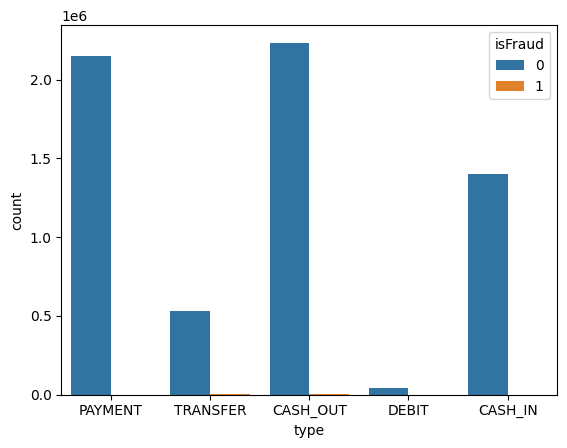

In [12]:
#there more customer which are of cash_out type
sns.countplot(x=df['type'],data=df, hue=df['isFraud'])

<ipython-input-13-fa1418242862>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

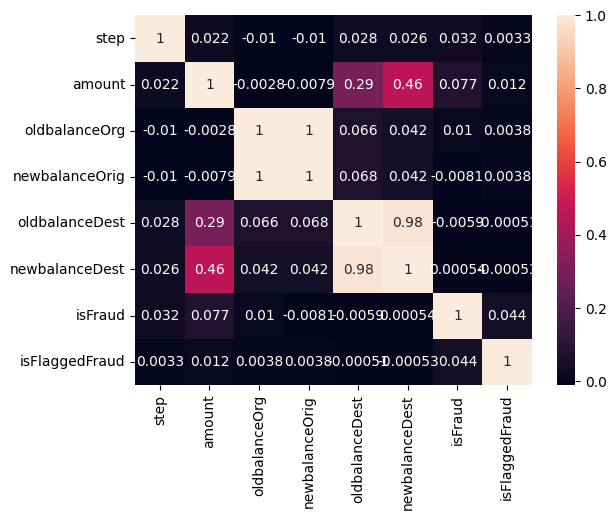

In [13]:
#by heat map we  finding the colinearity between independant
sns.heatmap(df.corr(),annot=True)

In [14]:
#here some features are correlated like oldbalance and newbalance but we are not deleting it

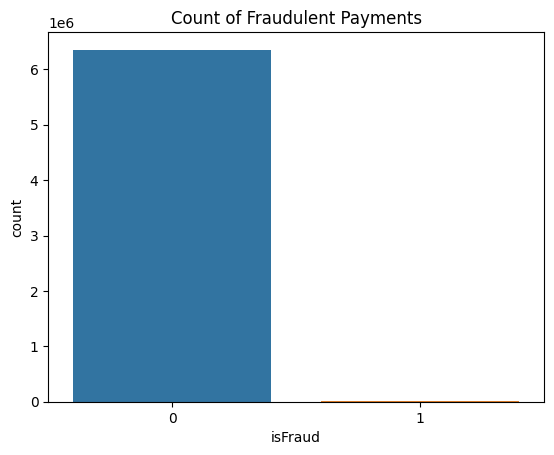

In [15]:
#there are more number of fraud customers
sns.countplot(x="isFraud",data=df)
plt.title("Count of Fraudulent Payments")
plt.show()

In [16]:
#print all the columns
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [17]:
# we drop the columns from x which are not important
x = df.drop(columns=['step','isFraud', 'isFlaggedFraud', 'nameOrig', 'nameDest'], axis=1)


In [18]:
x

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00
1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00
2,TRANSFER,181.00,181.00,0.00,0.00,0.00
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00
4,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00
...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13
6362616,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00
6362617,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11
6362618,TRANSFER,850002.52,850002.52,0.00,0.00,0.00


In [19]:
#type is object columns so we have to converet it into the numeric column by making its dummies
dummy=pd.get_dummies(x['type'])

In [20]:
dummy

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
6362615,0,1,0,0,0
6362616,0,0,0,0,1
6362617,0,1,0,0,0
6362618,0,0,0,0,1


In [21]:
#we drop the type columns from the x and then we add dummies of type in x
x=x.drop('type',axis=1)

In [22]:
#we add both  x and dummies and overwrite it in the dummies
x=pd.concat([x,dummy],axis=1)

In [23]:
!pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [24]:
#we choose isFraud column as our target column so we assign it to  y
y=df['isFraud']
y

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

In [25]:
#as dataset is highly  imabalance
y.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [26]:
x.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1
3,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0
4,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


In [27]:
#we install imblearn for making dataset balalnce by NearMiss
from imblearn.under_sampling import NearMiss

In [28]:
#by NearMiss we undersample the dataset so that our dataset is balance
nm=NearMiss()
x_trainm,y_trainm= nm.fit_resample(x,y)

In [29]:
y_trainm.value_counts()

0    8213
1    8213
Name: isFraud, dtype: int64

In [30]:
x_trainm.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0.02,0.0,0.0,0.0,0.0,0,0,0,1,0
1,0.02,0.0,0.0,0.0,0.0,0,0,0,1,0
2,0.03,0.0,0.0,0.0,0.0,0,0,0,1,0
3,0.06,0.0,0.0,0.0,0.0,0,0,0,1,0
4,0.09,0.0,0.0,0.0,0.0,0,0,0,1,0


In [31]:
#spliting  data into train and test
from  sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x_trainm,y_trainm,test_size=0.2,random_state=0)

In [32]:
#now data is balance
y_train.value_counts()

0    6583
1    6557
Name: isFraud, dtype: int64

In [33]:
y_test.value_counts()

1    1656
0    1630
Name: isFraud, dtype: int64

In [34]:
x_train.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
11910,2299330.46,2299330.46,0.00,0.00,0.0,0,0,0,0,1
14409,348983.86,348983.86,0.00,73131.44,422115.3,0,1,0,0,0
12110,257988.47,257988.47,0.00,0.00,0.0,0,0,0,0,1
6914,5360.79,5374.19,13.39,0.00,0.0,0,0,0,1,0
4135,76.53,0.00,0.00,0.00,0.0,0,0,0,1,0


In [35]:
y_train.shape

(13140,)

** Scalling the Model **
as data is having more different scale values having more difference so we
by us standardscaler to scale the data

In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [37]:
x_train

array([[ 0.84922366,  0.58458872, -0.068574  , ...,  0.        ,
        -1.00091366,  1.74479836],
       [-0.20645674, -0.18204964, -0.068574  , ...,  0.        ,
        -1.00091366, -0.57313213],
       [-0.25571057, -0.21781793, -0.068574  , ...,  0.        ,
        -1.00091366,  1.74479836],
       ...,
       [ 0.56156429,  0.37568959, -0.068574  , ...,  0.        ,
        -1.00091366,  1.74479836],
       [ 5.01742938,  5.09532225,  2.87621446, ...,  0.        ,
        -1.00091366,  1.74479836],
       [-0.39532489, -0.31922753, -0.068574  , ...,  0.        ,
         0.99908717, -0.57313213]])

#**Logistic Model**

Here we make first model which is logistic to classify our dataset

In [38]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(class_weight= 'balanced')
model.fit(x_train,y_train)

LogisticRegression(class_weight='balanced')

In [39]:
#predict the values
y_pred=model.predict(x_test)

**find the accuracy of the model, classificatio report and confusion matrix**

In [40]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_pred,y_test))
acc_lg=accuracy_score(y_pred,y_test)

print(acc_lg)

[[1627    3]
 [   0 1656]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1627
           1       1.00      1.00      1.00      1659

    accuracy                           1.00      3286
   macro avg       1.00      1.00      1.00      3286
weighted avg       1.00      1.00      1.00      3286

0.9990870359099209


In  logistic regression we get the 99% accuracy

---





# **CROSS VALIDATION for LOGISTIC REGRESSION**

In [41]:
from sklearn.model_selection import KFold, cross_val_score

In [42]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)  # Change the number of splits (e.g., n_splits=10) as needed


In [43]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced')  # You can use any model of your choice


In [44]:
scores = cross_val_score(model, x_trainm, y_trainm, scoring='accuracy', cv=k_fold)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [45]:
print("Cross-Validation Scores:", scores)
print("Average Accuracy:", np.mean(scores))



Cross-Validation Scores: [0.98417529 0.98600122 0.982958   0.98539257 0.98965307 0.98174072
 0.96163216 0.98416565 0.98842875 0.9908648 ]
Average Accuracy: 0.983501222845527


In [46]:
cross_log=np.mean(scores)
cross_log

0.983501222845527

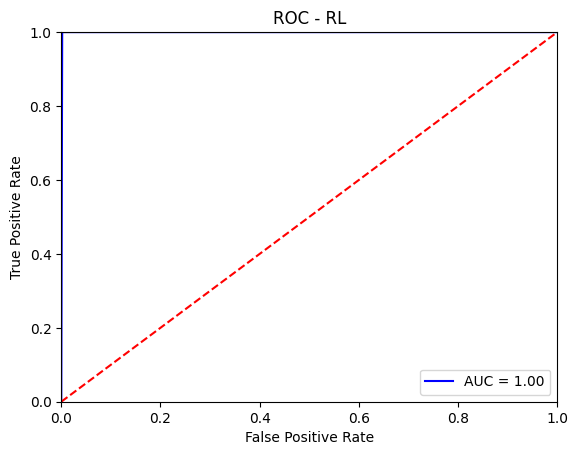

In [47]:
# AUC ROC - logistic regression
import sklearn.metrics as metrics

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RL')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [48]:
##############################################################################

In [49]:
#importing knn
from sklearn.neighbors import KNeighborsClassifier

**KNN MODEL**
WE MAKE KNN MODEL

In [50]:
knn_model=KNeighborsClassifier(n_neighbors=4)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [51]:
knn_prediction= knn_model.predict(x_test)

In [52]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(confusion_matrix(y_test,knn_prediction))

print(classification_report(y_test,knn_prediction))
acc_knn=accuracy_score(y_test,knn_prediction)
print(acc_knn)


[[1628    2]
 [   2 1654]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1630
           1       1.00      1.00      1.00      1656

    accuracy                           1.00      3286
   macro avg       1.00      1.00      1.00      3286
weighted avg       1.00      1.00      1.00      3286

0.9987827145465612


# **Cross validation for KNN**

In [53]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)
kscores = cross_val_score(knn_model, x_trainm, y_trainm, scoring='accuracy', cv=k_fold)
print("Cross-Validation Scores:", kscores)
print("Average Accuracy:", np.mean(kscores))

Cross-Validation Scores: [0.96895922 0.97565429 0.97504565 0.97321972 0.98052343 0.97200243
 0.97624848 0.9774665  0.97868453 0.98477467]
Average Accuracy: 0.976257892524518


In [54]:
cross_knn=np.mean(scores)
cross_knn

0.983501222845527

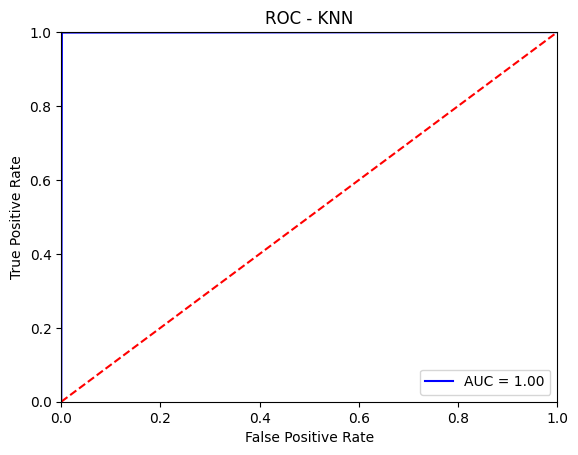

In [55]:

fpr, tpr, threshold = metrics.roc_curve(y_test,knn_prediction )
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - KNN')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **DECISSION TREE*

In [56]:
from sklearn.tree  import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [57]:
y_pred=classifier.predict(x_test)

In [58]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))
acc_dt=accuracy_score(y_test,y_pred)
print(acc_dt)

[[1628    2]
 [   0 1656]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1630
           1       1.00      1.00      1.00      1656

    accuracy                           1.00      3286
   macro avg       1.00      1.00      1.00      3286
weighted avg       1.00      1.00      1.00      3286

0.9993913572732805


In [59]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(classifier, x_trainm, y_trainm, scoring='accuracy', cv=k_fold)
print("Cross-Validation Scores:", scores)
print("Average Accuracy:", np.mean(scores))

Cross-Validation Scores: [1.         1.         0.99939136 1.         1.         0.99878271
 0.99878197 1.         1.         1.        ]
Average Accuracy: 0.9996956045023252


In [60]:
cross_dt=np.mean(scores)
cross_dt

0.9996956045023252

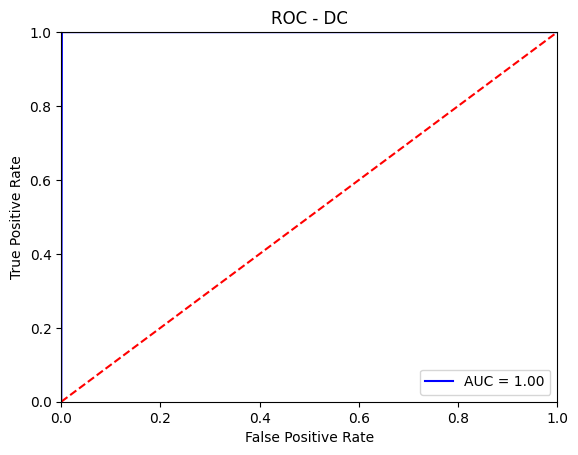

In [63]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - DC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **SVM**

In [64]:
from sklearn.svm import SVC
svm=SVC(kernel='linear',C=1,random_state=0)
svm.fit(x_train,y_train)

SVC(C=1, kernel='linear', random_state=0)

In [65]:
sv_pred=svm.predict(x_test)


In [66]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(confusion_matrix(y_test,sv_pred))

print(classification_report(y_test,sv_pred))
acc_svm=accuracy_score(y_test,sv_pred)

print(acc_svm)

[[1627    3]
 [   0 1656]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1630
           1       1.00      1.00      1.00      1656

    accuracy                           1.00      3286
   macro avg       1.00      1.00      1.00      3286
weighted avg       1.00      1.00      1.00      3286

0.9990870359099209


In [ ]:
# k_fold = KFold(n_splits=10, shuffle=True, random_state=42)
# scores = cross_val_score(svm, x_trainm, y_trainm, scoring='accuracy', cv=k_fold)
# print("Cross-Validation Scores:", scores)
# print("Average Accuracy:", np.mean(scores))

In [ ]:
cross_sv=np.mean(scores)
cross_sv